In [ ]:
!pip install mwclient
import mwclient
import time

site = mwclient.Site("en.wikipedia.org")
page = site.pages["Bitcoin"]

revs = list(page.revisions())

revs[0]



OrderedDict([('revid', 1228816165),
             ('parentid', 1225814205),
             ('user', 'Jtbobwaysf'),
             ('timestamp',
              time.struct_time(tm_year=2024, tm_mon=6, tm_mday=13, tm_hour=10, tm_min=18, tm_sec=39, tm_wday=3, tm_yday=165, tm_isdst=-1)),
             ('comment',
              '/* 2020–present */ add breadth, probably should be put in the LEAD as well')])

In [ ]:
revs = sorted(revs, key=lambda rev: rev["timestamp"])
revs[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OrderedDict([('revid', 275832581),
             ('parentid', 0),
             ('user', 'Pratyeka'),
             ('timestamp',
              time.struct_time(tm_year=2009, tm_mon=3, tm_mday=8, tm_hour=16, tm_min=41, tm_sec=7, tm_wday=6, tm_yday=67, tm_isdst=-1)),
             ('comment', 'creation (stub)')])

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

def find_sentiment(text):
    sent = sentiment_pipeline([text[:250]])[0]
    score = sent["score"]
    if sent["label"] == "NEGATIVE":
        score *= -1
    return score



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_t

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
find_sentiment("I love you")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9998656511306763

In [ ]:
find_sentiment("I hate you")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-0.9991129040718079

In [ ]:
find_sentiment("I feel neutral about you")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-0.9937905669212341

In [ ]:
edits = {}

for rev in revs:
    date = time.strftime("%Y-%m-%d",rev["timestamp"])
    if date not in edits:
        edits[date] = dict(sentiments=list(),edit_count=0)

    edits[date]["edit_count"] += 1

    revid = rev["revid"]
    edits[date]["sentiments"].append(find_sentiment(str(revid)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from statistics import mean

for key in edits:
    if isinstance(edits[key].get("sentiments"), list) and len(edits[key]["sentiments"]) > 0:
      edits[key]["sentiment"] = mean(edits[key]["sentiments"])
      edits[key]["neg_sentiment"] = len([s for s in edits[key]["sentiments"] if s<0])/ len(edits[key]["sentiments"])
      del edits[key]["sentiments"]
    else:
      edits[key]["sentiment"] = 0
      edits[key]["neg_sentiment"] = 0



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'2009-03-08': {'edit_count': 4,
  'sentiment': 0.7712436467409134,
  'neg_sentiment': 0.0},
 '2009-08-05': {'edit_count': 1,
  'sentiment': -0.6036497354507446,
  'neg_sentiment': 1.0},
 '2009-08-06': {'edit_count': 2,
  'sentiment': 0.12465089559555054,
  'neg_sentiment': 0.5},
 '2009-08-14': {'edit_count': 1,
  'sentiment': -0.5948744416236877,
  'neg_sentiment': 1.0},
 '2009-10-13': {'edit_count': 2,
  'sentiment': 0.04032471776008606,
  'neg_sentiment': 0.5},
 '2009-11-18': {'edit_count': 1,
  'sentiment': 0.7870281338691711,
  'neg_sentiment': 0.0},
 '2009-12-08': {'edit_count': 1,
  'sentiment': 0.8593637347221375,
  'neg_sentiment': 0.0},
 '2009-12-17': {'edit_count': 1,
  'sentiment': 0.7800628542900085,
  'neg_sentiment': 0.0},
 '2010-02-23': {'edit_count': 1,
  'sentiment': 0.7999914288520813,
  'neg_sentiment': 0.0},
 '2010-03-18': {'edit_count': 1,
  'sentiment': -0.5101177096366882,
  'neg_sentiment': 1.0},
 '2010-04-13': {'edit_count': 4,
  'sentiment': -0.73249784111976

In [ ]:
import pandas as pd

edits_df = pd.DataFrame.from_dict(edits, orient="index")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,4,0.771244,0.0
2009-08-05,1,-0.603650,1.0
2009-08-06,2,0.124651,0.5
2009-08-14,1,-0.594874,1.0
2009-10-13,2,0.040325,0.5
...,...,...,...
2024-05-21,4,0.822752,0.0
2024-05-22,9,0.797781,0.0
2024-05-24,1,0.907553,0.0
2024-05-26,1,0.805697,0.0


In [ ]:
edits_df.index = pd.to_datetime(edits_df.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from datetime import datetime
dates = pd.date_range(start="2009-03-08",end=datetime.today())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DatetimeIndex(['2009-03-08', '2009-03-09', '2009-03-10', '2009-03-11',
               '2009-03-12', '2009-03-13', '2009-03-14', '2009-03-15',
               '2009-03-16', '2009-03-17',
               ...
               '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08',
               '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14'],
              dtype='datetime64[ns]', length=5578, freq='D')

In [ ]:
edits_df = edits_df.reindex(dates, fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,4,0.771244,0.0
2009-03-09,0,0.000000,0.0
2009-03-10,0,0.000000,0.0
2009-03-11,0,0.000000,0.0
2009-03-12,0,0.000000,0.0
...,...,...,...
2024-06-10,0,0.000000,0.0
2024-06-11,0,0.000000,0.0
2024-06-12,0,0.000000,0.0
2024-06-13,1,0.918507,0.0


In [ ]:
rolling_edits = edits_df.rolling(30).mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rolling_edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,NaN,NaN,NaN
2009-03-09,NaN,NaN,NaN
2009-03-10,NaN,NaN,NaN
2009-03-11,NaN,NaN,NaN
2009-03-12,NaN,NaN,NaN
...,...,...,...
2024-06-10,0.600000,0.167285,0.0
2024-06-11,0.600000,0.167285,0.0
2024-06-12,0.533333,0.138126,0.0
2024-06-13,0.566667,0.168743,0.0


In [ ]:
rolling_edits = rolling_edits.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rolling_edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,0.025708,0.0
2009-04-07,0.000000,0.000000,0.0
2009-04-08,0.000000,0.000000,0.0
2009-04-09,0.000000,0.000000,0.0
2009-04-10,0.000000,0.000000,0.0
...,...,...,...
2024-06-10,0.600000,0.167285,0.0
2024-06-11,0.600000,0.167285,0.0
2024-06-12,0.533333,0.138126,0.0
2024-06-13,0.566667,0.168743,0.0


In [ ]:
rolling_edits.to_csv("wikipedia_edits.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rolling_edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,0.025708,0.0
2009-04-07,0.000000,0.000000,0.0
2009-04-08,0.000000,0.000000,0.0
2009-04-09,0.000000,0.000000,0.0
2009-04-10,0.000000,0.000000,0.0
...,...,...,...
2024-06-10,0.600000,0.167285,0.0
2024-06-11,0.600000,0.167285,0.0
2024-06-12,0.533333,0.138126,0.0
2024-06-13,0.566667,0.168743,0.0


In [ ]:
import yfinance as yf
import os
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc_ticker= yf.Ticker('BTC-USD')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc = btc_ticker.history(period='max')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-10 00:00:00+00:00,69644.312500,70146.070312,69232.421875,69512.281250,20597699541,0.0,0.0
2024-06-11 00:00:00+00:00,69508.078125,69549.414062,66123.601562,67332.031250,37116136345,0.0,0.0
2024-06-12 00:00:00+00:00,67321.375000,69977.890625,66902.453125,68241.187500,34497940694,0.0,0.0


In [ ]:
btc.index = pd.to_datetime(btc.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
del btc["Dividends"]
del btc["Stock Splits"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc.columns = [c.lower() for c in btc.columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Date'>

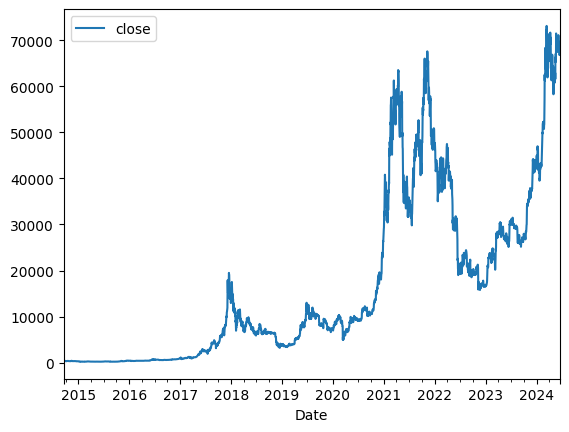

In [ ]:
btc.plot.line(y="close", use_index=True) # 'close' is now lowercase

In [ ]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
wiki

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,0.025708,0.0
2009-04-07,0.000000,0.000000,0.0
2009-04-08,0.000000,0.000000,0.0
2009-04-09,0.000000,0.000000,0.0
2009-04-10,0.000000,0.000000,0.0
...,...,...,...
2024-06-10,0.600000,0.167285,0.0
2024-06-11,0.600000,0.167285,0.0
2024-06-12,0.533333,0.138126,0.0
2024-06-13,0.566667,0.168743,0.0


In [ ]:
btc.index = btc.index.tz_localize(None)
wiki.index = wiki.index.tz_localize(None)
btc = btc.merge(wiki, left_index=True, right_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,0.219017,0.260340
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,0.220255,0.260340
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,0.245023,0.260340
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,0.218805,0.277007
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,0.214764,0.277007
...,...,...,...,...,...,...,...,...
2024-06-10,69644.312500,70146.070312,69232.421875,69512.281250,20597699541,0.600000,0.167285,0.000000
2024-06-11,69508.078125,69549.414062,66123.601562,67332.031250,37116136345,0.600000,0.167285,0.000000
2024-06-12,67321.375000,69977.890625,66902.453125,68241.187500,34497940694,0.533333,0.138126,0.000000
2024-06-13,68243.101562,68365.781250,66304.562500,66756.398438,28955204146,0.566667,0.168743,0.000000


In [ ]:
btc["tomorrow"] = btc["close"].shift(-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,0.219017,0.260340,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,0.220255,0.260340,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,0.245023,0.260340,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,0.218805,0.277007,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,0.214764,0.277007,402.152008
...,...,...,...,...,...,...,...,...,...
2024-06-10,69644.312500,70146.070312,69232.421875,69512.281250,20597699541,0.600000,0.167285,0.000000,67332.031250
2024-06-11,69508.078125,69549.414062,66123.601562,67332.031250,37116136345,0.600000,0.167285,0.000000,68241.187500
2024-06-12,67321.375000,69977.890625,66902.453125,68241.187500,34497940694,0.533333,0.138126,0.000000,66756.398438
2024-06-13,68243.101562,68365.781250,66304.562500,66756.398438,28955204146,0.566667,0.168743,0.000000,66847.843750


In [ ]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc["target"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


target
1    1885
0    1674
Name: count, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "open", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(min_samples_split=50, random_state=1)

In [ ]:
RandomForestClassifier(min_samples_split=50, random_state=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(min_samples_split=50, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7

In [59]:
def predict(train, predictors, model):
    model.fit(train[predictors], train["target"])
    test = train.iloc[-1:].copy()
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index,name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=200, learning_rate=.1, random_state=1)
predictions = backtest(btc, model, predictors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
precision_score(predictions["target"], predictions["predictions"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6037037037037037

In [ ]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close","sentiment","neg_sentiment"]
    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors += [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [56]:
btc, new_predictors = compute_rolling(btc.copy())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,0.219017,0.260340,424.440002,0,...,NaN,457.334015,5.033333,NaN,457.334015,5.033333,NaN,457.334015,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,0.220255,0.260340,394.795990,0,...,0.0,440.887009,5.050000,0.000000,440.887009,5.050000,0.000000,440.887009,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,0.245023,0.260340,408.903992,1,...,0.0,425.523336,5.100000,0.000000,425.523336,5.100000,0.000000,425.523336,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,0.218805,0.277007,398.821014,0,...,0.5,421.368500,5.125000,0.333333,421.368500,5.125000,0.333333,421.368500,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,0.214764,0.277007,402.152008,1,...,0.5,416.859003,5.146667,0.250000,416.859003,5.146667,0.250000,416.859003,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-10,69644.312500,70146.070312,69232.421875,69512.281250,20597699541,0.600000,0.167285,0.000000,67332.031250,0,...,0.5,70030.911830,0.600000,0.428571,65617.550130,0.545556,0.483333,43928.908390,1.985297,0.517808
2024-06-11,69508.078125,69549.414062,66123.601562,67332.031250,37116136345,0.600000,0.167285,0.000000,68241.187500,1,...,0.0,69568.664062,0.600000,0.285714,65619.819531,0.550000,0.483333,44042.413955,1.986484,0.517808
2024-06-12,67321.375000,69977.890625,66902.453125,68241.187500,34497940694,0.533333,0.138126,0.000000,66756.398438,0,...,0.5,69162.716518,0.590476,0.285714,65693.481445,0.553333,0.500000,44158.365898,1.987489,0.517808
2024-06-13,68243.101562,68365.781250,66304.562500,66756.398438,28955204146,0.566667,0.168743,0.000000,66847.843750,1,...,0.5,68591.178571,0.585714,0.285714,65710.442643,0.557222,0.483333,44272.425412,1.988311,0.517808


In [60]:
predictions = backtest(btc, model, new_predictors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
precision_score(predictions["target"], predictions["predictions"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

In [62]:
predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,target,predictions
2017-09-15,0,0
2018-02-12,0,0
2018-07-12,1,1
2018-12-09,0,0
2019-05-08,1,1
2019-10-05,0,0
2020-03-03,0,0
2020-07-31,1,1
2020-12-28,1,1
2021-05-27,0,0
